# Feature Selection: Wrapper Methods
- 5 Wrapper-based methods to choose relevant features
- https://medium.com/analytics-vidhya/feature-selection-85539d6a2a88

In [45]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

In [46]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

## Obtaining the Data
- dataset containstransactions made by credit cards; they are labeled as fraudulent or genuine. 
- Thedataset includes 30 features, which are the result of PCA. Due to confidentiality issues,the original features are not provided. 
- This is a classification task with a quiteimbalanced dataset and therefore, I will use f1-score (macro avg) as an evaluationmetric.

In [55]:
credit = pd.read_csv('../../data/creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [56]:
X = credit.loc[:, credit.columns != 'Class']
y = credit['Class']

Build full model with selected features

In [58]:
from sklearn.model_selection import StratifiedKFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
scv = StratifiedKFold(n_splits=5)
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


## 1. Forward Selection
- 사이킷런의 API와 동일(default = forward)
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

In [49]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
scv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

create the SequentialFeatureSelector object

In [13]:
sfs = SequentialFeatureSelector(LogisticRegression(C=10, max_iter=100), 
                                k_features=8,
                                forward=True,
                                floating=False,
                                verbose=2,
                                scoring='f1_macro',
                                cv=scv,
                                n_jobs=-1)

fit the object to the training data

In [14]:
sfs = sfs.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   15.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.5s finished

[2021-05-31 14:57:11] Features: 1/8 -- score: 0.7873248473688205[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  29 | elapsed:   21.0s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   28.2s finished

[2021-05-31 14:57:39] Features: 2/8 -- score: 0.8408637090351931[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  28 | elapsed:   20.7s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   29.5s finished

[2021-05-31 14:58:09] Features: 3/8 -- score: 0.846319046192335[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  27

In [15]:
selected_features = X.columns[list(sfs.k_feature_idx_)]
print(selected_features)
X = X.loc[:, selected_features]

Index(['Time', 'V1', 'V12', 'V14', 'V15', 'V16', 'V27', 'V28'], dtype='object')


LogisticRegression(C=10, max_iter=10000)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.74      0.78        98

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



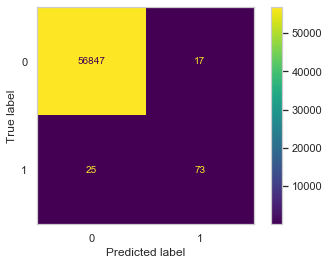

In [17]:
from sklearn.metrics import plot_confusion_matrix, classification_report
clf = LogisticRegression(C=10, max_iter=10000)
clf.fit(X_train.loc[:, selected_features], y_train)
y_predict = clf.predict(X_test.loc[:, selected_features])
print(classification_report(y_test, y_predict))
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(clf, X_test, y_test)

## 2. Backward Selection
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html((default = forward)
- Recursive Feature Elimination(RFE와 동일)
   * 인스턴스보다 변수가 많을 경우에는 backward selection은 사용 못함

## 3. Boruta algorithm
- https://github.com/scikit-learn-contrib/boruta_py
- Random forest와 같이 적용, R 패키지에서 차용
- 설명 : https://www.datacamp.com/community/tutorials/feature-selection-R-boruta

In [18]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', max_depth=4, n_jobs=-1)
boruta = BorutaPy(estimator = clf, n_estimators = 'auto', max_iter = 100) # number of trials to perform

boruta.fit(X_train.to_numpy(), y_train)

green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=4,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x2761E1C7E18),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2761E1C7E18)

In [19]:
print('Green area:', green_area)
print('Blue area:', blue_area)

Green area: ['Time', 'V1', 'V12', 'V14', 'V15', 'V16', 'V27', 'V28']
Blue area: []


RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=200,
                       n_jobs=-1)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.89      0.28        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.64     56962
weighted avg       1.00      0.99      0.99     56962



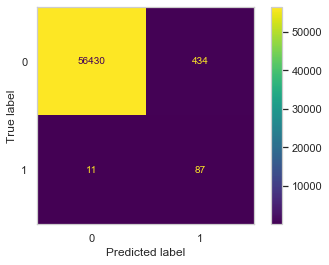

In [20]:
clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', max_depth=4, n_jobs=-1)
clf.fit(X_train[green_area].to_numpy(), y_train)
y_predict = clf.predict(X_test.loc[:, selected_features])
print(classification_report(y_test, y_predict))
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(clf, X_test, y_test)

## 4. Genetic algorithm
- https://pypi.org/project/sklearn-genetic/
- >pip install sklearn-genetic
- > poplulation
- > Fitness Calculation
- > Mating Pool
- > parents selection
- > Mating (Cross-over, Mutation)
- > Offsprings

## 시간이 많이 아주 많이 걸림

In [60]:
X_train.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.69098,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.70709,0.512885,-0.471198,0.002520,-0.069002,2.99


In [61]:
selector = GeneticSelectionCV(LogisticRegression(C=10, max_iter=10000, random_state=42),
                              cv= 2, # cv=scv,
                              verbose=2,
                              scoring="f1_macro",
                              max_features=5,
                              n_population=50,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=40,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=3,
                              n_gen_no_change=10,
                              caching=True,
                              n_jobs=-1)

selector = selector.fit(X_train, y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                    
0  	50    	[0.68212798 3.48      ]	[0.11945842 1.37462722]	[0.49954863 1.        ]	[0.84357876 5.        ]
1  	24    	[-1599.35022035     4.48      ]	[3.66634414e+03 1.43164241e+00]	[-1.e+04  1.e+00]      	[0.8439416 8.       ]  
2  	26    	[-1199.28381291     4.44      ]	[3.24987983e+03 1.51208465e+00]	[-1.e+04  1.e+00]      	[0.85200198 9.        ]
3  	37    	[-1999.34586596     4.56      ]	[4.00032707e+03 1.51208465e+00]	[-1.e+04  1.e+00]      	[0.85556775 9.        ]
4  	20    	[-1399.27591309     4.58      ]	[3.47016246e+03 1.07870292e+00]	[-1.e+04  3.e+00]      	[0.85556775 8.        ]
5  	30    	[-1599.28716329     4.64      ]	[3.66637166e+03 1.01508620e+00]	[-1.e+04  3.e+00]      	[0.8611715 8.       ]  
6  	27    	[-1199.24999869     4.62      ]	[3.24989232e+03 9.14111591e-01]	[-1.e+04  3.e+00]      	[0.8611715 7.       ]  
7  	2

In [62]:
selector.support_

array([False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False])

In [63]:
# get the selected features
cols = X.columns.tolist()
selected_feats = [cols[i] for i in np.where(selector.support_)[0]]

# train and test
clf = LogisticRegression(C=10, max_iter=10000, random_state=42)
clf.fit(X_train[selected_feats], y_train)
preds = clf.predict(X_test[selected_feats])
print(classification_report(y_test, preds))

LogisticRegression(C=10, max_iter=10000, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.60      0.70        98

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



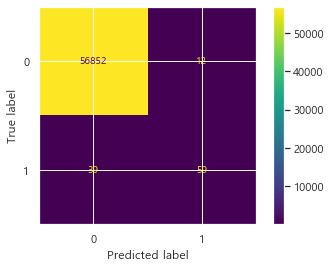

In [64]:
plot_confusion_matrix(clf, X_test[selected_feats], y_test)

## 예제

In [65]:
from sklearn import datasets, linear_model
iris = datasets.load_iris()

# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

X = np.hstack((iris.data, E))
y = iris.target
print(X.shape)

(150, 24)


## n_generations가 길면 최적화

In [66]:
from genetic_selection import GeneticSelectionCV

estimator = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

selector = GeneticSelectionCV(estimator, cv=5,
                              verbose=1, scoring="accuracy",
                              
                              max_features=5, n_population=50,
                              
                              crossover_proba=0.5, mutation_proba=0.2, n_generations=100,
                              n_gen_no_change=10, caching=True, 
                              n_jobs=-1)
selector = selector.fit(X, y)
print(selector.support_)

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max        
0  	50    	[0.44306667 3.08      ]	[0.22215194 1.45382255]	[0.16666667 1.        ]	[0.92 5.  ]
1  	27    	[-799.396    3.78 ]    	[2.71311011e+03 1.57848028e+00]	[-10000.      0.]      	[0.92 6.  ]
2  	29    	[-2199.35813333     4.88      ]	[4.14280392e+03 1.21061968e+00]	[-1.e+04  1.e+00]      	[0.92 8.  ]
3  	27    	[-999.21826667    4.66      ]  	[3.00026058e+03 8.62786184e-01]	[-1.e+04  3.e+00]      	[0.92 7.  ]
4  	22    	[-199.10693333    4.4       ]  	[1.40012758e+03 7.74596669e-01]	[-1.e+04  2.e+00]      	[0.92 6.  ]
5  	34    	[-399.1168    3.98  ]          	[1.95977208e+03 1.14000000e+00]	[-1.e+04  2.e+00]      	[0.92 8.  ]
6  	34    	[-599.1352    3.52  ]          	[2.37508691e+03 1.11785509e+00]	[-1.e+04  2.e+00]      	[0.92 6.  ]
7  	26    	[-199.1036    2.9   ]          	[1.40012806e+03 1.00498756e+00]	[-1.e+04  2.e+00]      	[0.9333333

# End